<a href="https://colab.research.google.com/github/SAIGANESH02/Wine_Quality_Prediction/blob/main/WineQualityRed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
!pip install tensorflow==2.0.0alpha

     |████████████████████████████████| 80.3MB 36kB/s 
     |████████████████████████████████| 419kB 49.0MB/s 
     |████████████████████████████████| 3.0MB 53.0MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

**Get the data** : 

First download and import the dataset using pandas:

In [ ]:
df = pd.read_csv("winequality-red.csv", sep = ";")

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Clean the data :**

The dataset contains a few unknown values.

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Split the data into train and test :**

Now split the dataset into a training set and a test set.

Use the test set in the final evaluation of our models.

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

**Inspect the data :**

Have a quick look at the joint distribution of a few pairs of columns from the training set.

It should be clear that they are each functions of eachother.

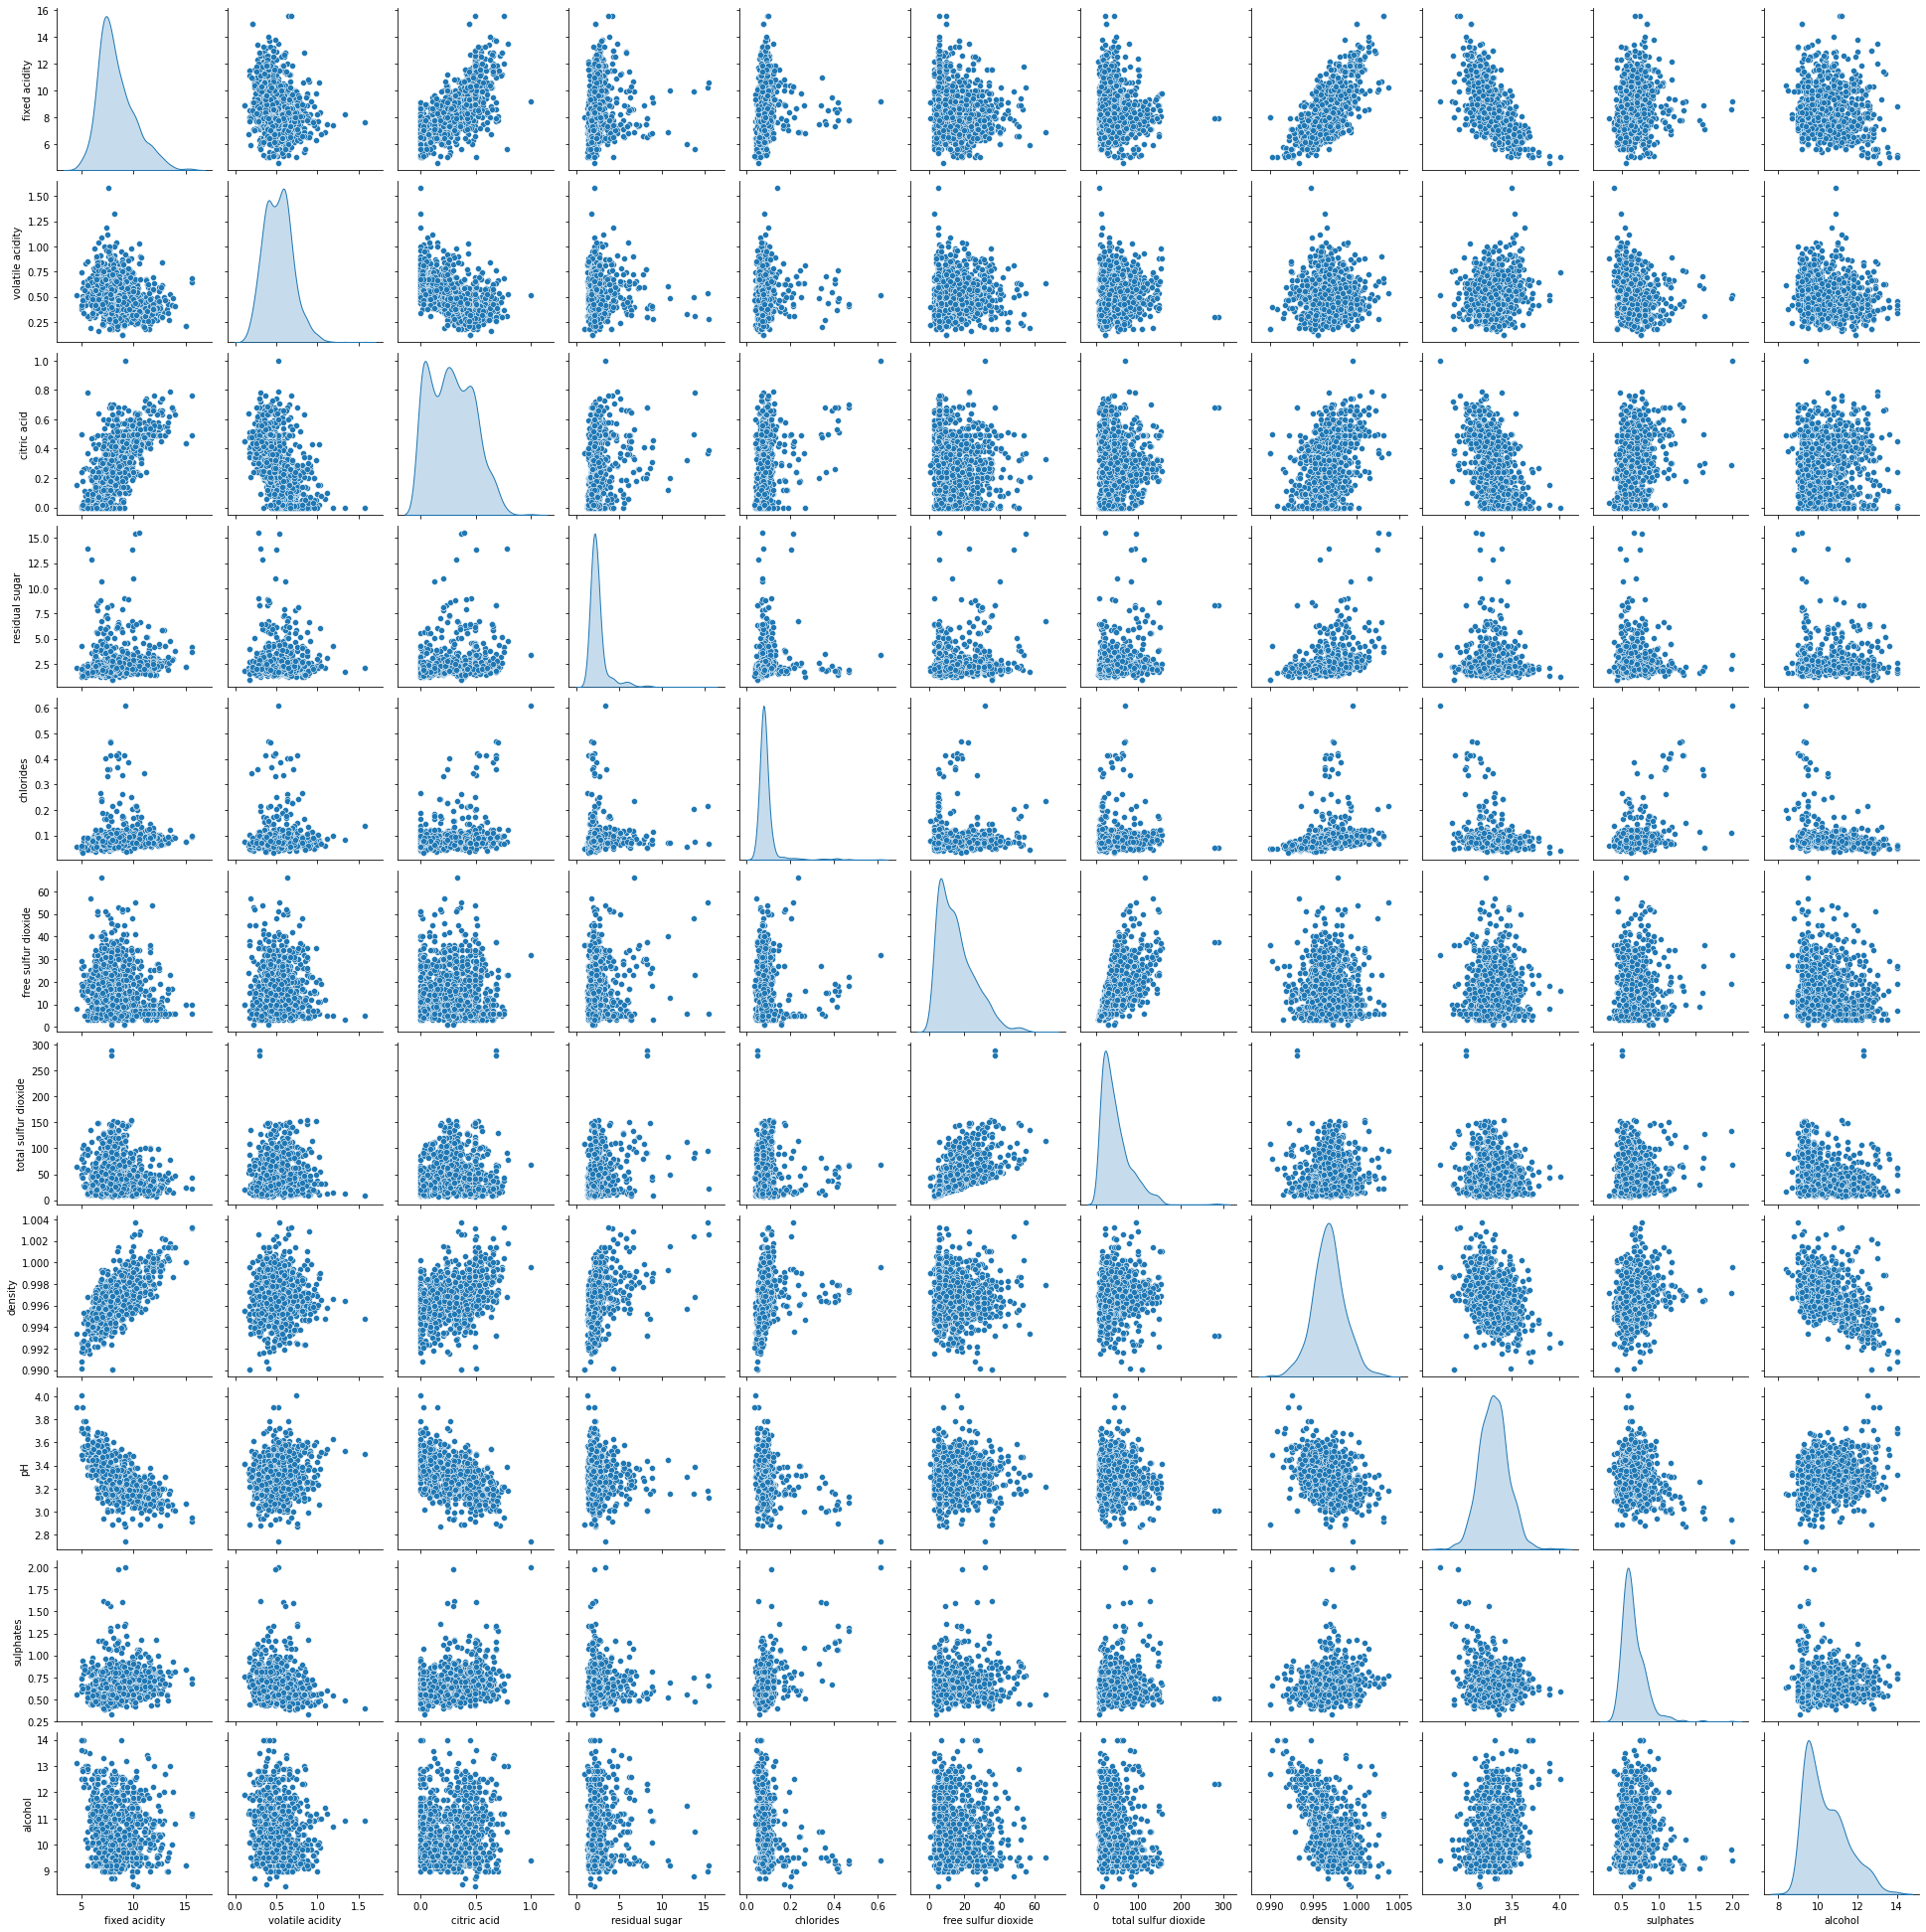

In [ ]:
sns.pairplot(train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']], diag_kind='kde')

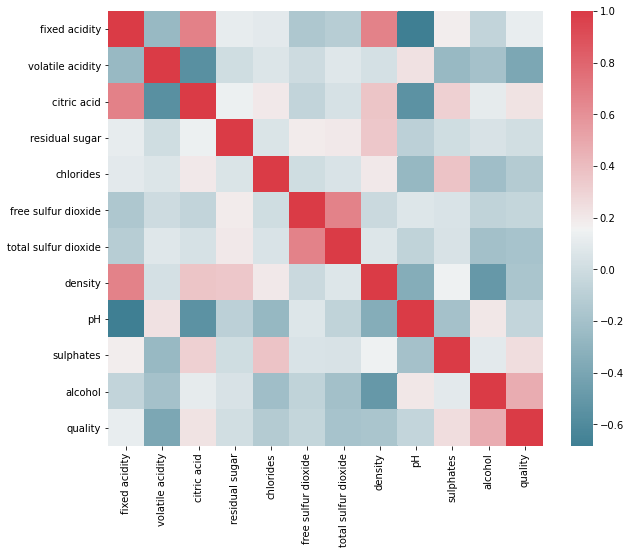

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

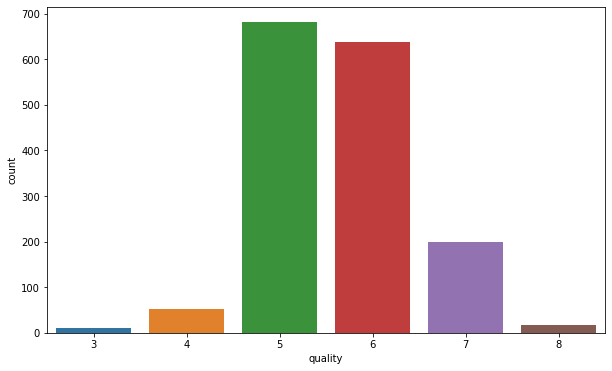

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"])
df["quality"].value_counts()

**Normalization :**

In the table of statistics it's easy to see how different the ranges of each feature are.

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
889,10.7,0.90,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
1297,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6
1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,5
920,9.6,0.41,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.5,5
841,6.6,0.66,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,5


In [ ]:
train_stats = train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1119.0,8.381591,1.743349,4.60000,7.15000,8.0000,9.3000,15.60000
volatile acidity,1119.0,0.525107,0.175766,0.12000,0.39000,0.5200,0.6325,1.58000
citric acid,1119.0,0.278624,0.196727,0.00000,0.10000,0.2600,0.4400,1.00000
residual sugar,1119.0,2.538293,1.403231,0.90000,1.90000,2.2000,2.6000,15.50000
chlorides,1119.0,0.087803,0.047921,0.03400,0.07000,0.0790,0.0905,0.61000
free sulfur dioxide,1119.0,15.774352,10.408764,1.00000,7.00000,14.0000,22.0000,66.00000
total sulfur dioxide,1119.0,46.372654,33.616019,6.00000,21.00000,37.0000,62.0000,289.00000
density,1119.0,0.996801,0.001889,0.99007,0.99561,0.9968,0.9979,1.00369
pH,1119.0,3.307113,0.151702,2.74000,3.20000,3.3000,3.4000,4.01000
sulphates,1119.0,0.659071,0.167803,0.33000,0.55000,0.6200,0.7300,2.00000


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

In [ ]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
# train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
# test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
889,10.7,0.90,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3
1297,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1
1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0
920,9.6,0.41,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.5
841,6.6,0.66,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3


In [ ]:
train_x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.381591,0.525107,0.278624,2.538293,0.087803,15.774352,46.372654,0.996801,3.307113,0.659071,10.410664
std,1.743349,0.175766,0.196727,1.403231,0.047921,10.408764,33.616019,0.001889,0.151702,0.167803,1.052848
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.150000,0.390000,0.100000,1.900000,0.070000,7.000000,21.000000,0.995610,3.200000,0.550000,9.500000
50%,8.000000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996800,3.300000,0.620000,10.100000
75%,9.300000,0.632500,0.440000,2.600000,0.090500,22.000000,62.000000,0.997900,3.400000,0.730000,11.100000
max,15.600000,1.580000,1.000000,15.500000,0.610000,66.000000,289.000000,1.003690,4.010000,2.000000,14.000000


In [ ]:
train_y.head()

889     5
1297    6
1344    5
920     5
841     5
Name: quality, dtype: int64

In [ ]:
train_y.describe()

count    1119.000000
mean        5.627346
std         0.813352
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
no_features = train_x.shape[1]
no_features

11

**Linear regression :**

Before building a DNN model, start with a linear regression.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[no_features]),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

In [ ]:
history = model.fit(train_x, train_y, epochs=50, callbacks=[callbacks])

Epoch 1/50
1119/1119 [==============================] - 0s 83us/sample - loss: 1.7835 - mae: 0.9791
Epoch 2/50
1119/1119 [==============================] - 0s 34us/sample - loss: 0.6199 - mae: 0.6026
Epoch 3/50
1119/1119 [==============================] - 0s 32us/sample - loss: 0.5612 - mae: 0.5685
Epoch 4/50
1119/1119 [==============================] - 0s 33us/sample - loss: 0.5574 - mae: 0.5773
Epoch 5/50
1119/1119 [==============================] - 0s 32us/sample - loss: 0.5054 - mae: 0.5417
Epoch 6/50
1119/1119 [==============================] - 0s 31us/sample - loss: 0.4963 - mae: 0.5350
Epoch 7/50
1119/1119 [==============================] - 0s 31us/sample - loss: 0.5238 - mae: 0.5545
Epoch 8/50
1119/1119 [==============================] - 0s 32us/sample - loss: 0.5431 - mae: 0.5707
Epoch 9/50
1119/1119 [==============================] - 0s 32us/sample - loss: 0.4979 - mae: 0.5433
Epoch 10/50
1119/1119 [==============================] - 0s 32us/sample - loss: 0.4952 - mae: 0.5361

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,epoch
45,0.486481,0.539304,45
46,0.494950,0.542480,46
47,0.472184,0.529581,47
48,0.460686,0.523209,48
49,0.455825,0.518004,49


Text(0.5, 0, 'Epochs')

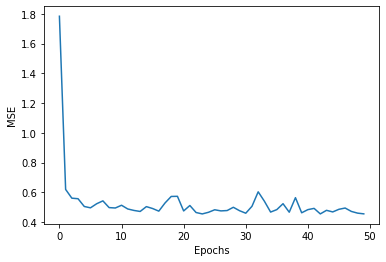

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

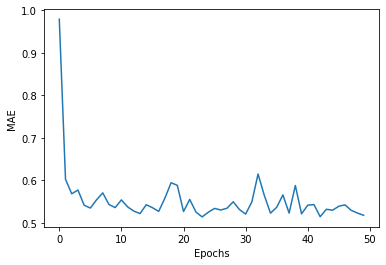

In [ ]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [ ]:
test_mse, test_mae = model.evaluate(test_x, test_y)

480/480 [==============================] - 0s 82us/sample - loss: 0.4339 - mae: 0.5273


In [ ]:
test_mse

0.43386438886324563

In [ ]:
test_mae

0.5273453

In [ ]:
predict = model.predict(test_x)
for i in range(predict.shape[0]):
  predict[i][0] = int(predict[i][0])
sum = 0
test_y=list(test_y)
for i in range(predict.shape[0]):
  if (predict[i][0] == test_y[i]):
    sum += 1
print((sum/predict.shape[0])*100)

50.0
